# Fitbit Data Analysis
by Michele Ortiz  
CPSC 222

## 1. Introduction
I chose to analyze data from my Fitbit, which is in the fitness domain. Fitness is important to me because it impacts nearly every part of life; fitness is extremely important to physical health, but it is also essential for mental health. Good fitness can help prevent countless diseases, both physical and mental. Within the fitness domain, I am researching the relationship between daily temperature/day of the week and different attributes related to fitness (steps, distance walked, calories burned, minutes active, etc.). In order to do this, I used daily data from my Fitbit from August 1-October 31, as well as a dataset I created with the day of the week for each of those dates, and the [Meteostat API](https://dev.meteostat.net/api/) weather data across the same dates. 

I originally hypothesized that I was more active on Sundays, Tuesday, and Thursdays than the other days of the week and that I was more active in cool weather than in warm weather. I use these hypotheses to formulate hypothesis tests using my datasets. 

I decided to use binary classification on my overall minutes of activity per day. I split my dataset into "low activity" and "high activity" days based on the total number of active minutes each day, then I trained the kNN classifier to predict whether a day was low or high activity based on the day of the week, high temperature, and number of steps for that day. I did the same using a decision tree, but I found that the kNN classifier more accurate at 87% (compared to 74% for the decision tree). 

The results of my analysis provide me insight into my personal fitness habits. They show me when I am naturally more active and when I need to push myself to stay active and healthy. I also think that, overall, the analysis is a good reminder that I need to be more intentional about staying active in general, even when circumstances are unusual and it's more difficult than usual. 

Although I am analyzing my personal data, the results could be of interest to Fitbit and to anyone who is interested in improving or understanding their own fitness habits. People could use insight from my analysis to be aware that there are certain times that they need to encourage themselves more to be active, and they could conduct their own analysis to learn more specifically about their own fitness habits. Even aside from my results, Fitbit could also use the possibility of analyzing behavior patterns to improve fitness as a marketing tool, and they could even offer the analysis as a separate product or as part of the purchase of a Fitbit.

## 2. Data Analysis
The primary dataset of interest is my Fitbit data, which I was able to export from Fitbit's website as a .csv file. The attributes of the Fitbit data include the date, which will be my key, and steps, distance, calories burned, minutes sedentary, minutes active (broken up by lightly, fairly, and very active), and activity calories. The Fitbit data did not require cleaning, but I did merge several months' worth of data in Excel simply by copying and pasting rows.

I merged the Fitbit data with a .csv file of days of the week that I created, and I got a list of the high temperatures for each day by parsing the JSON data from the Meteostat API.

In the following code cells, I import my datasets, merge them, add rows for total active minutes and temperature range, and create different visualizations. I then conduct two hypothesis tests, one relating to days of the week and one relating to temperature, both of which come my hypothses on the project proposal.

In [1]:
import utils
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
fitbit_df = pd.read_csv("fitbit_data_aug-oct.csv", index_col=0)
dates_df = pd.read_csv("Day of Week.csv", index_col=0)

I created a series of total minutes of activity that would include all levels of activity (lightly, fairly, and very active). I then added the Series as a column in my fitbit_df.

In [3]:
activity_ser = pd.Series(dtype=float)
for date in fitbit_df.index:
    activity_ser[date] = fitbit_df["Minutes Lightly Active"][date] + fitbit_df["Minutes Fairly Active"][date] + fitbit_df["Minutes Very Active"][date]
fitbit_df["Minutes Total Activity"] = activity_ser

Next, I merged my fitbit_df with the dates_df so I would also have the day of the week with my Fitbit data. 

In [4]:
merged_df = fitbit_df.join(dates_df)
grouped_df = merged_df.groupby("Day")

### Visualizations

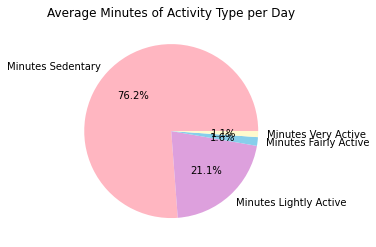

In [5]:
activity_type_ser = utils.create_avg_ser(fitbit_df)
utils.create_pie_chart(activity_type_ser.index, activity_type_ser, "Average Minutes of Activity Type per Day", ["lightpink", "plum", "skyblue", "lemonchiffon"])

This pie chart shows what percentage of my day I spend at each activity level on average. On average, I spend 76.2% of my day sedentary (which includes sleeping most nights), 21.1% lightly active, and just around 1% each fairly active and very active.

#### Visualizations by day of the week

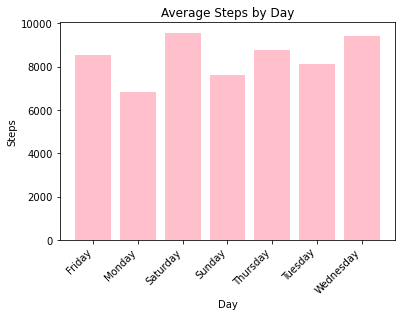

In [6]:
steps = utils.create_mean_series(grouped_df, "Steps")
utils.create_bar_chart(steps.index, steps, "Day", "Steps", "pink")

The graph above shows that, on average, I take the most steps on Saturdays, followed by Wednesdays. I take the fewest steps on average on Mondays, with Sundays being the second fewest.

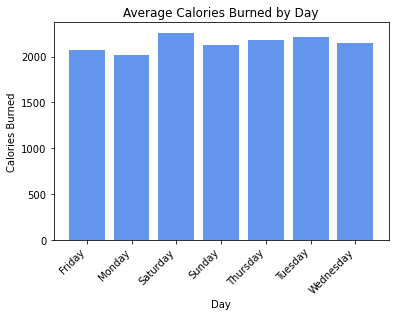

In [7]:
cal_burned = utils.create_mean_series(grouped_df, "Calories Burned")
utils.create_bar_chart(cal_burned.index, cal_burned, "Day", "Calories Burned", "cornflowerblue")

The graph above shows that, on average, I burn a similar number of calories each day of the week. I typically burn the most calories on Saturday and the fewest on Mondays.

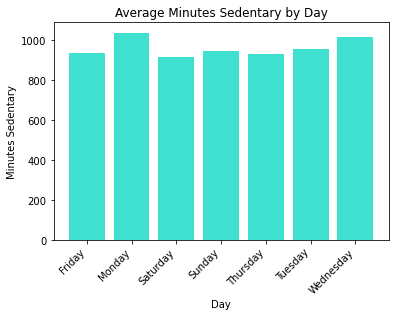

In [8]:
min_sedentary = utils.create_mean_series(grouped_df, "Minutes Sedentary")
utils.create_bar_chart(min_sedentary.index, min_sedentary, "Day", "Minutes Sedentary", "turquoise")

The graph above shows that I am most sedentary on Mondays on average, followed by Wednesdays. I am least sedentary on Saturdays on average.

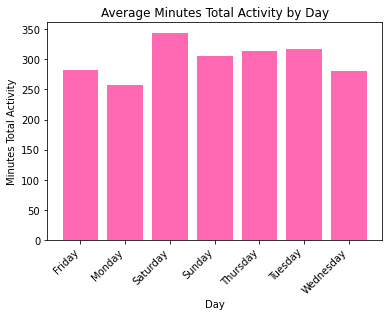

In [9]:
min_activity = utils.create_mean_series(grouped_df, "Minutes Total Activity")
utils.create_bar_chart(min_activity.index, min_activity, "Day", "Minutes Total Activity", "hotpink")

The above graph shows that I typically spend the most minutes active on Saturdays. Sundays, Tuesdays, and Thursdays all have a similar number of average minutes of activity. On average, I spend the fewest minutes being active on Mondays.

### Hypothesis Testing  
In my project proposal, I hypothesized that my most active days overall would be Sundays, Tuesdays, and Thursdays. Given this hypothesis, I decided to conduct a hypothesis test to see on which weekend day I was more active, Saturday or Sunday.

Step 1:  
$$H_0: \mu_{Sun} \leq \mu_{Sat}$$  
$$H_1: \mu_{Sun} > \mu_{Sat}$$ 

Step 2:  
$$\alpha = 0.01$$

Step 3:  
$$t_{computed} = \frac{\overline{X}_{Sun} - \overline{X}_{Sat}}{\sqrt{s_p^2 (\frac{1}{n_{Sun}} + \frac{1}{n_{Sat}})}}$$

$$ s_p^2 = \frac{(n_{Sun} - 1)s_{Sun}^2 + (n_{Sat} - 1)s_{Sat}^2}{n_{Sun}+n_{Sat}-2} $$

Step 4:    
$t_{critical} = 2.485$ (from t-table with $\alpha = 0.01$, df = 25 for a one-tailed test)  
If $t_{computed} \geq 2.485$, reject $H_0$  
If $t_{computed} < 2.485$, fail to reject $H_0$

Step 5:  
Compute $t_{computed}$.  
$t_{computed} = -1.788$ (work shown in code cell below)  
Since $-1.788 < 2.485 (t_{computed})$, we fail to reject $H_0$.  
We conclude $H_0: \mu_{Sun} \leq \mu_{Sat}$ with $\alpha = 0.01$.  
This means that my average total number of active minutes on Sundays is less than or equal to my average total number of active minutes on Saturdays.

In [65]:
sun_df = merged_df[merged_df.Day == "Sunday"] # create a df of only Sunday instances
sun_ser = sun_df["Minutes Total Activity"] # create a series of min. activity on each Sunday

sat_df = merged_df[merged_df.Day == "Saturday"] # do the same for Saturday
sat_ser = sat_df["Minutes Total Activity"]

print("df:", len(sun_df) + len(sat_df) - 2) # calculate degrees freedom (n1 + n2 -2)

t_computed, p_val = stats.ttest_ind(sun_ser, sat_ser)
print("t_computed:", t_computed)

df: 25
t_computed: -1.7879260384760685


#### Visualizations by temperature

After creating visualizions using the day of the week, I added Temperature as a feature in my Fitbit dataset. I used the [Meteostat API](https://dev.meteostat.net/api/) to get daily weather data for Spokane, Washington and I parsed the JSON file to just get the daily high temperatures for each date in my dataset.

In [10]:
high_temps = utils.get_temps()
fitbit_df["Temperature"] = high_temps

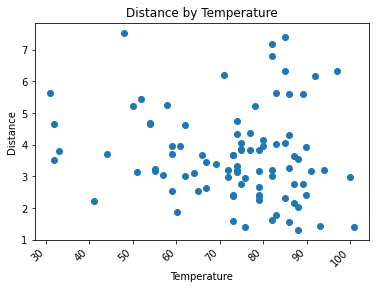

In [14]:
utils.create_scatter_plot(fitbit_df["Temperature"], fitbit_df["Distance"], "Temperature", "Distance")

This scatter plot shows that the distance I walk is fairly inconsistent and does not appear to have any strong relationship to the temperature.

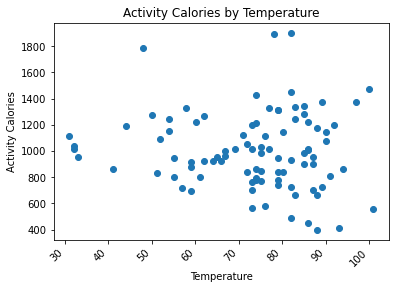

In [13]:
utils.create_scatter_plot(fitbit_df["Temperature"], fitbit_df["Activity Calories"], "Temperature", "Activity Calories")

The scatter plot does not show any consistent trend. There is a lot more data with temperatures in the 70s and above, and the number of calories I burn from activity ranges quite a bit.

In order to make it easier to work with the temperature data, I filtered it into three categories: low, medium, and high. The low temperature range captured high temperatures from [30, 53.6) degrees F, the medium ranged from [53.6, 77.3) degrees F, and the high include temperatures from [77.3, 101) degrees F.

In [11]:
categories = []
for i in range(len(fitbit_df)):
    if 30 <= fitbit_df["Temperature"][i] < 53.6:
        categories.append("Low")
    elif 53.6 <= fitbit_df["Temperature"][i] < 77.3:
        categories.append("Medium")
    elif 77.3 <= fitbit_df["Temperature"][i] < 101:
        categories.append("High")
        
fitbit_df["TempRange"] = categories

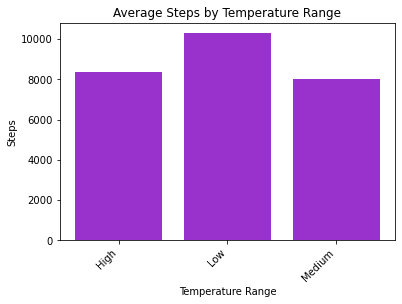

In [63]:
grouped_by_temp = fitbit_df.groupby("TempRange")

steps_by_temp = utils.create_mean_series(grouped_by_temp, "Steps")
utils.create_bar_chart(steps_by_temp.index, steps_by_temp, "Temperature Range", "Steps", "darkorchid")

The above graph shows that, on average, I walk more in low temperatures than in both high and medium temperatures. I walk slightly more in high temperatures than in medium temperatures, but the difference is fairly small.

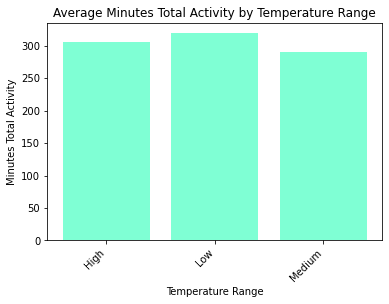

In [64]:
min_activity_temp = utils.create_mean_series(grouped_by_temp, "Minutes Total Activity")
utils.create_bar_chart(min_activity_temp.index, min_activity_temp, "Temperature Range", "Minutes Total Activity", "aquamarine")

The average minutes of total activity does not seem to differ as much by temperature group as steps did. While I still seem to be most active in low temperatures and least active in medium temperatures, all three groups are fairly close together.

### Hypothesis Testing  
In my project proposal, I hypothesized that I was more active on cooler days than warmer days. I decided to conduct a hypothesis test to see if I burned a different number of calories from activity on "high" temperature days than I did on "low" temperature days.

Step 1:  
$$H_0: \mu_{h} = \mu_{l}$$  
$$H_1: \mu_{h} \neq \mu_{l}$$ 

Step 2:  
$$\alpha = 0.001$$

Step 3:  
$$t_{computed} = \frac{\overline{X}_{h} - \overline{X}_{l}}{\sqrt{s_p^2 (\frac{1}{n_{h}} + \frac{1}{n_{l}})}}$$

$$ s_p^2 = \frac{(n_{h} - 1)s_{h}^2 + (n_{l} - 1)s_{l}^2}{n_{h}+n_{l}-2} $$

Step 4:    
$t_{critical} = +- 3.496$ (from t-table with $\alpha = 0.001$, df = 50 for a two-tailed test)  
If $t_{computed} \leq -3.496$ or $t_{computed} \geq 3.496$, reject $H_0$  
If $-3.496 < t_{computed} < 3.496$, fail to reject $H_0$

Step 5:  
Compute $t_{computed}$.  
$t_{computed} = -0.850$ (work shown in code cell below)  
Since $-3.496 < -0.850 < 3.496 (t_{computed})$, we fail to reject $H_0$.  
We conclude $H_0: \mu_{h} = \mu_{l}$ with $\alpha = 0.001$.  
This means that the number of calories I burn from activity in low temperatures is equal to the number of calories I burn from activity in high temperatures.

In [66]:
high_temp_df = fitbit_df[fitbit_df.TempRange == "High"] # df of instances with high temp. only
high_temp_ser = high_temp_df["Activity Calories"] # create a series of the activity calories from the high temp. df

low_temp_df = fitbit_df[fitbit_df.TempRange == "Low"] # same process for instances with low temp.
low_temp_ser = low_temp_df["Activity Calories"]

print("df:", len(high_temp_df) + len(low_temp_df) - 2) # calculate degrees freedom

t_computed, p_val = stats.ttest_ind(high_temp_ser, low_temp_ser)
print("t_computed:", t_computed)

df: 50
t_computed: -0.8498363454159945


## Classification

To start the process of classification, I first created the DataFrame that would serve as my x variable. To do so, I created a new DataFrame called class_df. I set the class_df equal to my dates_df so it would have the dates as index and day of the week as a feature. I then added the daily steps and high temperatures from the fitbit_df.

In [67]:
class_df = dates_df
class_df["Steps"] = fitbit_df["Steps"]
class_df["Temperature"] = fitbit_df["Temperature"]

Next, I changed my "Day" feature to numeric values rather than categorical.

In [68]:
day_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
class_df = utils.convert_categoricals(class_df, "Day", day_labels)

Once my class_df was ready to use in my classifications, I created my y variable, the class label I will be rpedicting. To do so, I took the data from the "Minutes Total Activity" feature of my fitbit_df to classify each day as either a "low activity" day or a "high activity" day. I chose 325 minutes of activity as the cutoff between low and high activity.

In [69]:
column = "Minutes Total Activity"
cutoff = 325 

activity_level = []
for i in range(len(fitbit_df)):
    if fitbit_df[column][i] <= cutoff:
        activity_level.append("Low activity")
    elif fitbit_df[column][i] > cutoff:
        activity_level.append("High activity")

Next, I scaled my x variable (class_df) so all values would be in the range [0,1] and broke up my x variable and my y variables (activity_level) into training and test sets. I used random_state = 0 in the train_test_split function for reproducability.

In [70]:
X_train, X_test, y_train, y_test = utils.scale_split(class_df, activity_level)

Finally, I was able to train the kNN classifier on my training set and make predictions about the instances in my test set. I chose to use k = 5 nearest neighbors.

In [71]:
k = 5

clf = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

print("y_predicted:", y_predicted)
print("Accuracy:", accuracy)

y_predicted: ['Low activity' 'High activity' 'Low activity' 'Low activity'
 'High activity' 'Low activity' 'Low activity' 'Low activity'
 'Low activity' 'Low activity' 'Low activity' 'Low activity'
 'High activity' 'Low activity' 'Low activity' 'High activity'
 'High activity' 'Low activity' 'Low activity' 'Low activity'
 'Low activity' 'Low activity' 'Low activity']
Accuracy: 0.8695652173913043


Using the kNN classifier with k = 5, I got about 87% accuracy with the predictions on the test set.

In order to have something to compare my kNN results to, I also used a decision tree classifier. I trained the decision tree on the same x and y training set I used for the kNN classifier and tested with the same test set. 

In [72]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
prediction = tree_clf.predict(X_test)
tree_accuracy = tree_clf.score(X_test, y_test)

print("y_predicted:", prediction)
print("Accuracy:", tree_accuracy)

y_predicted: ['Low activity' 'Low activity' 'Low activity' 'Low activity'
 'High activity' 'Low activity' 'Low activity' 'High activity'
 'High activity' 'Low activity' 'Low activity' 'Low activity'
 'Low activity' 'Low activity' 'Low activity' 'High activity'
 'High activity' 'High activity' 'Low activity' 'Low activity'
 'Low activity' 'Low activity' 'Low activity']
Accuracy: 0.7391304347826086


The predictions made using the decision tree were about 74% accurate.

## 3. Classification Results

I used the kNN classifier to predict activity level (low or high) by the day of the week, daily high temperature, and number of steps (since number of steps is not directly related to minutes of activity as it is possible to get a high number of steps in a short period of time and still have an overall low activity level for the day). In order to prepare the data set, I used MinMaxScaler() to scale my three x-variables to values in the range [0, 1]. Then I split my DataFrame of instances and my list of activity levels into training and test sets, with 75% used for training and 25% reserved as the test set. I used a random state of 0 when splitting the data into training and test sets for reproducability. I used accuracy to test how well the kNN classifier performed on the test set. I achieved about 87% accuracy. 

In order to make a comparison, I also used a decision tree classifier. I trained it on the same dataset that I used to train the kNN classifier and tested it on the same instances. The decision tree yielded about 74% accuracy with its predictions.

The kNN classifier was about 13% more accurate than the decision tree classifier, showing that it is more accurate at predicting my activity level based on factors of temperature, day of the week, and number of steps.

## 4. Conclusion
I learned a lot of things about my fitness habits from this project. They include:
* I am not as active as I should be in general
* I am most active on Saturdays and least active on Mondays
* I am most active in low temperatures and least active in high temperatures
    * This may be due to the limited data in low temperature ranges
* I was incorrect in believing I must be more active in general on days I routinely go to the gym

I used my Fitbit dataset for this project, which includes attributes relating to activity such as steps walked, calories burned, minutes active, etc. Since none of the attributes in the dataset are categorical, I had to use the data available to create a categorical variable and make my own determinations about what level of activity would qualify as high or low. 

Though I had to create my own categorical variable, I was able to achieve fairly high accuracy with my classifications. I used the variables of steps, day of the week, and temperature to predict if I had a high or low activity level, and I got about 87% accuracy in these predictions using the kNN classifier. The decision tree classifier was less accurate at 74%. I was surprised that it was possible to predict my activity level based on just a few factors. I think the predictions could have been even more accurate with more information such as time spent at work or in class.

I think that the results of my Fitbit analysis show that it possible to get insightful informations about one's fitness data. I think Fitbit (and any company with a similar product) could leverage this possibility to sell more Fitbits by marketing the ability to analyze this data. I also think Fitbit could make money by offering data analysis as a product to customers. Individuals could benefit by learning more about the habits that could potentially inspire them to improve their fitness and realize what stops them from being active. I do not forsee any ethical issues that would arise directly from the analysis, but I could see how the marketing of such a product could be unethical. Companies could target people's insecurities about their bodies to sell the product rather than targeting the desire to be healthier and happier, but that kind of advertising will unfortunately be prevalent with or without data analysis.